In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Input, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Lambda, Layer
from tensorflow.keras.models import Sequential
import pandas as pd

In [107]:
f = pd.read_hdf("../events_anomalydetection_DelphesPythia8_v2_qcd_features.h5")

In [108]:
G = (f[['pxj1','pxj2', 'pyj1', 'pyj2']]).to_numpy()
px1 = G[:, 0]
py1 = G[:, 2]
px2 = G[:, 1]
py2 = G[:, 3]

In [109]:
t1f =  [-0.121126175, 3.9099712, 5.512944, 4.559253, 1.4167271, 2.7279987, 6.304571, 2.4213333, 1.4671254, 2.1283963, 3.791819, 5.3069744, 1.7942721, 5.614301, 4.288953, 1.9761542, 0.84010583, 4.7622886, 6.5612864, 0.038120262, 5.5788875, 0.22956586, 4.2354302, 5.067194, 2.4287202, 5.7598033, 4.523249, 6.0579596, 0.31869808, 0.3806679, -0.021471983, -0.26547262, 5.5394106, 6.688596, 4.643363, 1.1588823, 3.953312, 3.88908, 1.22682, 5.665076, 3.8037875, 4.964166, 3.5878973, 2.4434438, 1.485535, 4.303644, 1.9892104, 3.6374931, 6.6114335, 2.023343, 0.82186425, 4.9626336, 0.75526375, 2.0909038, 1.4860681, 5.595909, 6.6317663, 5.615341, 4.0039654, 5.505885, 0.8429617, 4.118614, 2.3207054, 6.2012143, 0.5458555, 6.819613, 5.590299, 3.0352478, 3.3090875, 4.861334, 4.6132026, 1.7378389, 0.37871057, 1.9407464, 4.144968, 3.369713, 3.9725363, 0.28393134, 6.374024, 0.5471496, 6.1267233, 2.868677, 2.4860282, 1.0312989, 1.9170743, 6.0553555, 4.7964373, 3.8095572, 1.3706783, 3.705665, 6.198295, 1.7611337, -0.15327172, 2.0261755, 0.80849904, 2.2520292, 0.055842668, 0.54724437, 4.638647, 2.1840527, 0.23676716, 4.842241, -0.39665014, 1.7535664, 2.4596176, 5.942515, 5.438557, 0.054563615, 0.08941801, 0.42317918, 3.157963, 3.8748333, 4.8185954, 5.7736635, 1.0656457, 4.7844596, 5.440651, 2.0513704, 0.108513944, 0.44675368, 0.8853404, 5.564956, 5.4245334, 1.6724766, 4.855691,3.413377, 6.639105, 3.2849567, 5.3288436, 2.2724175, 3.4888237, 3.7224724, -0.4343309, 3.447921, 5.7459254, 5.0914702, 2.5499563, 2.5950477, 5.1721873, -0.043087017, 5.589896, 6.523603, 5.099552, 6.075043, 2.4936564, 3.5569975, 0.9582025, 1.3234217, 3.4070334, 0.73211, 3.7461023, 1.2973293, 7.00151, 4.950013, 3.3250487, 2.1855698, 1.894216, 4.16928, 0.23495224, 5.2137384, 1.3233547, 3.4824955, 2.399103, 2.9344518, 4.6922493, 1.120424, 1.950616, 5.0580635, 4.7495384, 3.9962974, 4.219151, 4.8223248, 4.2134285, 0.34789404, 3.8035822,
       3.0573366, 6.3302813, 4.2207575, 5.5949354, 5.221025, 5.8259606, -0.710074, 2.6442294, 5.083866, 5.5990386, 2.099508, 0.47219816, 4.2995424, 0.32183295, -0.09671503, 2.542963, 0.18074869, 4.0172696, 1.7382334, 6.234951, 3.5555189, 4.4428825, 2.9585996, 3.2008836, 0.011673117, 1.0991544, 4.860899, 2.6267571, 6.097968, 5.126798, 2.3265142, 0.101998, -0.5229961, 4.5055947, 0.39153856, 1.985886, 5.87686, 4.89934, 1.6894623, 0.32915905, 6.434055, 3.143882, 5.6088643, 3.8192067, 1.9674549, 0.8125971, 3.1405258, 4.6721683, 4.2522798, 2.4567387
       ]
t2f =  [3.248753, 3.7196968, 5.5485044, 5.1355405, 4.444682, 4.901626, 0.77997154, 5.0843487, 4.9820323, 3.0358062, 3.7774353, 1.3930894, 0.30241445, -0.43874744, 3.9613945, 0.12353011, 6.419239, 1.9689331, 6.7716503, 3.6509616, 3.836613, 0.9583441, -0.36944893, 1.2413545, 2.0720465, 0.86788684, 3.417927, 4.4064198, 1.0056672, 2.877893, 3.5405192, 3.1416762, 2.4304855, 3.0267353, 5.2616353, 5.2616334, 2.7870283, 5.8168263, -0.582424, 6.798914, 4.9787884, 6.5577273, 5.9822335, 2.3556442, 5.866405, 1.8535063, 4.1700363, 6.61424, 0.6026165, 2.0563662, 0.07796714, 5.09795, 3.4972608, 3.356905, 0.5671177, 6.763571, 3.198208, 2.5075557, 6.3308234, 0.28894195, 1.3755258, 4.9549365, 4.976529, 4.210649, 0.53323877, 1.2381806, 3.577056, 1.9578545, 5.1339564, 2.3533864, 1.193189, 3.128363, 2.9912813, 0.74118537, 4.045928, 5.459544, 1.8923984, 3.859625, 0.40242302, 0.6338064, 4.099718, 4.8646045, 4.902281, 2.1226978, 2.9154546, 0.944539, 2.3206766, 4.968303, 4.3734136, 3.6137748, 1.1983932, 2.8243024, 1.3731593, 4.861555, 5.7082906, 4.9594674, 6.4634395, 6.0515647, 6.6150627, -0.4121492, 1.3389091, 2.49492, 6.061063, 2.6348093, 3.6643507, 1.3335849, 6.191738, 1.3837477, 1.1511437, 1.0242894, -0.30946755, 0.5017553, 6.4713836, 2.9484472, 4.2307205, 1.094421, 3.0625224, 2.1549757, 1.2454736, 4.563533, 3.1061509, 4.284146, 0.065691754, 5.9875937, 0.42096594,4.8364725, 3.2316854, 1.878105, -0.7615223, 3.422511, 2.5492508, 2.266589, 3.1033204, 6.3909545, 1.2341617, -0.42011598, 1.7644764, 1.7930607, 2.013588, 4.59397, 3.8071904, 3.0375881, 5.2167287, 4.5205007, 1.8422832, 5.4534554, 3.470494, 0.7235617, 5.9899397, 3.5047472, 6.1762524, 4.50338, 2.5580552, 3.3909955, -0.05167882, 5.3073893, 1.0607709, 1.9167204, 6.8367643, 2.138113, 3.1341019, 5.145744, 1.9101557, 4.979096, 5.183798, 4.4211826, 4.2319226, -0.7938761, 0.8732103, 5.3751655, 5.619063, 1.1944263, 1.0724062, -0.1384002, 2.40599,
       3.1487038, 4.0084386, 3.4121892, 0.6504498, 6.368197, 5.99379, 3.6215374, -0.11054103, 1.9982202, 1.3209256, 0.1701211, -0.24603005, 3.4412918, 4.3370705, 3.304764, 5.879533, 1.1122487, 6.323028, 6.7378263, 1.4207863, 4.9305854, 4.2403884, 4.974311, 2.10639, 4.3075967, 2.4112105, 5.0463314, 5.1084166, 3.1418269, 2.1384945, 4.996793, 1.3979406, 5.0819197, 6.0454297, 2.9490914, 5.198634, 7.676517, 4.0844727, 3.1324298, 0.87537736, 3.4942496, 4.925463, 4.533694, 3.4625719, 4.9992366, 4.254671, 4.933568, 1.9476048, 1.1075212, 4.8764367
       ]
t3f =  [3.6210308, 5.048145, 4.2859855, 1.2563632, 3.8674068, 7.1996465, 5.2218623, 2.848014, 5.4039836, 6.223199, 2.0135596, 6.6349416, 4.87303, 3.7912068, 2.1369214, 6.220013, 1.7750108, 5.09886, 1.9376698, 4.190419, 6.7977567, 5.0833545, 6.1263647, 3.8058317, 4.2722573, 4.0229173, 4.974627, 2.5967517, 2.2280893, 3.6125615, 4.159276, -0.0006755708, 2.1808271, 0.30827025, 4.45067, 5.167052, 0.28950676, 5.896637, 1.7575141, 1.2882704, 4.0109186, -0.05521815, 2.6775591, 2.5998387, 1.9713944, 3.076968, 4.248403, 1.0620259, 6.161128, 2.9695947, 3.2112732, 0.79186785, 4.2939396, 3.2789214, 6.2864556, 1.3275299, 6.134623, 5.2260733, 0.02825278, 1.1524866, 2.6276839, 3.1259978, 3.0402365, 4.115659, 3.7094796, 2.4811044, 1.8937956, 1.1250144, 1.0990584, 2.9188826, 3.675518, 4.503301, 3.5914211, 4.9532046, 5.56815, 1.2286355, 2.3347166, 5.4108357, 0.87000144, -1.1593657, 2.4734595, 2.806182, 5.772019, 4.2078404, -0.07575314, 3.6562264, 1.8930612, 3.2978928, 3.8022914, 2.2738464, 5.7255635, 3.090663, 0.9231839, 5.67457, 5.6950054, 2.4057813, 0.7989987, 5.1726766, 3.183838, 3.3813748, 2.5021777, 5.0962706, 6.872491, 6.226508, 3.8576746, 5.840754, 0.08528549, 3.5209987, 4.970765, 2.1192422, 2.1607103, 0.62157327, 6.269425, 2.7838857, 3.001003, 4.2574635, 3.0681934, 2.9348114, 3.8354816, 3.587837, 1.0592334, 2.194377, 1.3752217, 6.305854, 3.098531,0.6151286, 4.269937, 1.3645146, 0.79310745, 0.2527546, 1.8903396, 0.64233613, -0.099445246, 3.5492585, 3.5128958, 6.4802938, 0.2833726, 2.9922721, 2.1899261, 5.5060368, 0.51153886, 3.8637233, 4.238407, 5.676487, 5.968955, 1.212213, 2.945408, 0.0879454, -0.6708597, 5.948992, 1.3050743, 3.8716903, 0.73839515, 0.048429698, 4.1128063, 4.966994, 5.4534626, 0.11189578, 0.8525421, 2.1853144, 6.286424, 4.057021, 3.3318222, 5.6379647, 0.28946, 4.2545667, 3.867698, 4.4956346, 4.360972, 1.2377431, 4.3339047, 6.6152844, 0.98763734, 2.6641204, 6.8390274,
       3.2935977, 1.3107058, 4.9919863, 1.1598151, 4.5618176, 3.8963869, 6.721261, 1.9265273, 2.185344, 3.6110082, 4.872843, 5.3124914, 1.752544, 2.4514403, 5.298535, 3.609636, -0.8466278, 1.3579643, 1.8285545, 3.8400679, -0.1482704, 5.110688, 5.714886, 4.068664, 5.6112185, 1.2096553, 4.171114, 2.0433493, 6.336854, 2.5185394, 3.3420427, 5.4449277, 1.3710346, 4.562676, 3.6790113, 1.8963902, 3.9217186, 6.308989, 1.3359115, 1.9394351, 2.3090594, 3.432394, 6.256408, 2.7182224, 5.7098536, 2.9210591, 3.0921495, 2.4346817, 4.0429697, 2.8988945
       ]
t4f =  [2.65199, 4.3975124, 2.0078604, 1.9707259, 2.296003, 3.9343104, 4.18867, 1.1785948, 4.2702255, 6.347152, 4.2369146, 5.242095, 1.3875941, 5.626773, 4.1563, 3.193873, 1.3787833, 4.3172565, 4.365769, 2.0756283, 5.769172, 4.326558, 3.2896051, 5.419924, 5.1663756, 5.185371, 1.2127547, 2.6231134, 4.1733084, 5.08873, 2.1380825, -0.0018306496, 0.95713603, 2.8364303, 5.014741, 4.2273893, 2.8517966, 6.6705008, 4.5306334, 8.09692, 2.173319, 6.336803, 3.6033504, 6.8509555, 0.6600184, 3.423092, 2.0311887, 5.191794, 1.2221239, 3.2951236, 3.072292, 2.4028409, 5.1134734, 3.009544, 3.1446345, 1.8168286, 3.2921393, 4.2231007, 3.1056066, 1.9278796, 2.9749904, 2.832856, 6.0581164, 5.3123574, 2.5555718, 0.80457264, 4.3003006, 2.0206983, 5.00532, 3.3406274, 5.754124, 5.0154805, -0.4467204, 1.2996767, 3.8370938, 1.979151, 3.7970717, 0.8771242, -0.88657224, 1.2009593, 3.6590126, 3.593427, 4.201431, 5.193619, 3.2139833, 5.5432425, 1.2953452, 0.068193644, 5.397897, 0.87902683, 3.5993085, 0.041757036, 0.0673333, 0.6523749, 0.56986314, 1.0246309, 2.343173, 1.2311637, -0.033852607, 2.9020295, 2.5760474, 1.1372899, 5.68532, 6.339071, 2.430319, 6.6386685, 6.19817, 2.5220563, 4.8024693, 4.0498314, 4.101736, 5.6284103, 3.1553671, 0.35422143, 3.2289777, 1.9316593, 0.07260465, 0.22345315, -0.650923, 2.9346032, 5.0589685, 0.7129861, 2.0015771, 6.2659507, 3.1778915,0.41187847, 1.9903486, 2.1131172, -0.7993389, 2.8899517, 1.2492498, 2.4727364, 3.2427008, 2.7323048, 3.0544403, -0.19010429, 3.353681, 5.2035766, 4.0183434, 2.328272, 2.6286209, 2.4180896, 2.0513182, 3.4144266, 0.16787232, 1.9808865, 3.336173, 6.1828012, 0.660768, 0.33532125, 4.965147, 5.5768175, 5.55182, -0.061681528, 2.1437874, 4.4438844, 4.061929, 2.9898114, 5.417759, 4.059257, 6.27879, 5.436357, 3.040964, 5.8056164, 6.008327, 2.0586307, 2.4458694, 4.918149, 1.8966187, 5.0310054, 5.0003037, 2.7589066, 5.238869, 0.47372407, 2.6935961,
       6.1327415, 1.8575163, 4.3855877, 5.0523763, 4.870057, 2.3590581, 5.8619857, 1.0663195, 0.95093954, 2.5644884, 1.3001351, 4.1442757, 1.4117142, 3.86924, 0.9759594, 5.8274374, 3.8887599, 1.7935932, 1.374029, 3.473437, 1.9705834, 4.2852273, 3.6852705, 2.5285885, 3.5472195, 1.8912127, 5.29865, 0.9192266, 3.0978584, 6.918799, 2.8785858, 6.45473, 1.9069501, 1.7220262, 2.6099315, 4.4453506, 5.911805, 3.1033328, 5.035078, 4.364821, 0.8223698, 5.7680883, 6.1188216, 0.41075534, 3.2633479, 3.475297, 4.3329797, 0.55973744, 5.3529, 6.204096
       ]
t5f =  [6.387846, 2.5749526, 5.55432, 4.2632694, 1.3101554, 4.51704, 2.3639793, 1.2284046, 1.2842859, 3.0298557, 0.6537075, 4.5316143, 3.4487414, 3.595515, 0.94988275, -0.12404027, 3.0220697, 1.1907619, 0.48970085, 0.47480556, 6.9649653, 2.0978355, 0.3715716, 5.001923, 4.2042155, 5.456345, 3.1027713, 1.3826607, 4.2271104, 2.0378985, 0.38304767, 3.138873, 3.8870249, 3.2578843, 1.0248114, 1.0570945, 0.35472253, 5.804631, 5.6924634, 2.6410553, 4.9550877, 3.409457, -0.2887352, 3.9623806, -0.17485066, 1.8717823, 1.0870528, 3.4651344, 4.1790366, 2.0688224, 0.07887314, 1.2006032, 6.063764, 6.498839, 5.7129936, 5.816847, -0.06005056, 3.745238, 3.0987368, 6.0080905, 4.531791, 1.8079649, 4.4804406, 5.237151, 0.549153, 1.9013004, 3.5835578, 4.371802, 4.978067, -0.77254194, 1.9543822, -0.054295834, 3.2965064, 0.7600287, 2.2273707, 4.019832, 1.8506583, 0.6936458, 6.666467, 0.7178661, 4.364458, 4.9303484, 4.5326285, 4.169886, 0.22090824, 5.0388837, 7.1017222, 4.4515576, 5.288725, 5.8221397, 1.9458125, 3.4532244, 1.3246343, 4.8934393, 2.5662389, 1.2676846, 6.0878115, 2.9932842, 5.949719, 5.8794208, 1.3754557, 2.4787908, 6.0580335, 5.7778, 0.52834046, 4.5301476, -0.091811255, 4.523551, 4.743625, 4.3075323, 5.969234, 3.6432831, 2.951171, 3.3304856, 1.1625717, 1.0948596, 0.07997454, 0.9745496, 4.970131, 4.5846066, 3.242393, 5.0509477, -0.13940102, 5.985255, 0.4277731,4.836149, 3.2494762, 4.535639, 2.3536086, -0.2770803, 0.5786027, 0.87611777, 3.1865313, 6.3923182, 4.152153, 5.8469553, 4.439505, 1.4255619, 2.2756171, 4.8268423, 2.4883347, -0.109535456, 5.205717, 1.9095645, 4.9756665, 4.0937524, 3.464885, 0.72994816, 2.848679, 3.5066283, -0.09523654, 1.8616872, 5.685516, 3.399159, 3.0883245, 1.0072622, 2.0430834, 1.2328779, 0.5308492, 5.3049397, 3.1355603, 1.1441575, 1.8036739, 4.9452157, 2.0140245, 1.277424, 1.1001458, 3.8946204, 4.071209, 5.3142037, 0.7680776, 5.072285, 1.0848902, 3.2859375, 0.7699024,
       3.1323225, 2.1556025, 5.9060445, 3.6636744, 3.0750263, 2.8258867, 3.6200235, 0.062001165, 1.143705, 4.449154, 3.2965035, 0.271028, -0.31113714, 1.167669, 6.4501715, 3.5445106, 2.0878968, 3.0855792, 2.7310107, 1.4516633, 4.5042863, 5.165523, 4.518015, 5.106315, 1.8821176, 0.70464975, 1.2066021, 1.2379764, 3.1274347, 1.0389993, 1.8784448, 4.5354304, 2.8381107, 2.8715782, 6.0869837, 5.198148, 4.910834, 5.361932, 6.235062, 0.86577225, 2.7927704, 1.3269129, 1.3840958, -0.31880692, 4.4470544, 1.008739, 7.9767933, 1.1663867, 5.2009974, 1.3967235
       ]
t6f =  [0.25882995, 0.3932895, 6.458685, 4.203123, 2.9952543, 3.700658, 2.371143, 3.784301, 3.5041454, 2.0837293, 3.2290213, 3.5735242, 1.902793, 2.7457554, 3.3639276, 1.143077, 2.2193654, 3.9251845, 5.6603723, 0.559308, 0.9678819, 2.2620392, 5.0671177, 0.39863172, 4.787952, 1.6404276, 1.8997058, 2.9129837, 1.4056567, 0.7314916, 6.7309995, 6.0156164, 3.2868507, 2.8093197, 1.9918301, 3.4482918, 7.1912413, 4.0422473, 5.2037034, 4.0256057, 1.188235, 1.3811817, 3.7268836, 1.023212, 4.49891, 5.493552, 2.8086996, 3.2746003, 2.1036866, 1.513243, 0.84995854, 3.359031, 2.1858172, 4.127522, 1.4999615, 2.2160053, 3.5289106, 3.1427922, 7.133534, 2.1203945, 3.6142776, 0.65555537, 4.080257, 2.1692014, 7.0450892, 0.9371492, 1.034392, 5.3469067, 2.1934824, 1.1590046, 0.5137219, 1.3574318, 2.8809402, 3.996757, 5.7617064, 5.4492154, 0.6462068, 5.5662675, 0.4918771, -1.0303824, 2.1392555, 5.7613764, 2.2178133, 3.316771, 5.017422, 1.285713, 4.199694, 2.5188103, 0.2683997, 0.18893947, 1.1638534, 1.4505454, 2.3044763, 6.049627, 5.7265606, 4.0078144, 2.8546088, 0.43244353, 4.8560576, 2.0776734, 3.0174158, 1.0529817, 6.036284, 4.646179, 3.5082765, 1.9884163, 5.459989, 4.198951, 3.3082378, 1.5056968, 3.555331, 2.6961076, 1.6398027, 3.5622058, 4.495077, 2.215554, 2.3172636, 4.7752113, 1.4466215, 3.3484304, 5.221163, 5.2982597, 2.2317169, 1.5993172, 4.7829757,-0.06709769, -0.44308656, 5.692085, 0.27917218, 5.4950604, 5.5787954, 0.98216814, 3.5484784, 3.3443623, 3.1154826, 5.1958776, 2.6352706, 2.7459252, 6.321187, 0.058465686, 4.0945663, 6.2738123, 0.3519726, 0.7012042, 5.153245, 5.3229146, 1.0346816, 1.5368495, 2.709834, 0.822591, 2.4759457, 6.0666094, 5.886492, 4.9013367, 3.4254847, 4.8971586, 6.2734313, 1.8395975, 0.59393823, -0.006607695, 1.3233002, 1.6623572, 6.7619987, 6.1823163, 0.932815, 2.0246487, 3.5709643, 4.050663, 4.2046523, 1.7757843, 1.4549214, 5.580239, 3.0676253, 3.3423326, 1.1025193,
       6.323004, 3.5991044, 5.425412, 5.1299534, 4.226697, 0.16350813, 5.4173193, 5.650975, 3.1885984, 3.5708616, 2.1398215, 3.23795, 5.2449102, 4.9296503, 5.9824862, 5.536458, 1.5361949, 5.4317217, 1.2025826, 2.8295448, 3.7308156, -0.56548077, 2.19945, 1.6325014, 1.349665, 2.529672, 2.817421, 4.7038035, 3.3252888, 2.5562, 5.0035977, 2.2274606, 0.325552, 4.586793, 6.036004, 4.8328266, 7.0216064, 1.4807281, 1.6986314, 5.359634, 2.6818392, 2.291607, 2.3359835, 0.57662654, 3.5901678, 4.573318, 1.2668283, 2.9607, 6.181051, 2.6335006
       ]

T = np.array([t1f, t2f, t3f, t4f, t5f, t6f])

In [110]:
def rotate(t, X):
    s1 = np.sin(t[0])
    c1 = np.cos(t[0])
    s2 = np.sin(t[1])
    c2 = np.cos(t[1])
    s3 = np.sin(t[2])
    c3 = np.cos(t[2])
    s4 = np.sin(t[3])
    c4 = np.cos(t[3])
    s5 = np.sin(t[4])
    c5 = np.cos(t[4])
    s6 = np.sin(t[5])
    c6 = np.cos(t[5])
    R1 = np.array([[c1, s1, 0.0, 0.0], [-1.0*s1, c1, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]]) #px1 -> py1     
    R2 = [[c2, 0.0, s2, 0.0], [0.0, 1.0, 0.0, 0.0], [-1.0*s2, 0.0, c2, 0.0], [0.0, 0.0, 0.0, 1.0]] #px1 -> px2
    R3 = [[c3, 0.0, 0.0, s3], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [-1.0*s3, 0.0, 0.0, c3]] #px1 -> py2
    R4 = [[1.0, 0.0, 0.0, 0.0], [0.0, c4, s4, 0.0], [0.0, -1.0*s4, c4, 0.0], [0.0, 0.0, 0.0, 1.0]] #px2 -> py1
    R5 = [[1.0, 0.0, 0.0, 0.0], [0.0, c5, 0.0, s5], [0.0, 0.0, 1.0, 0.0], [0.0, -1.0*s5, 0.0, c5]] #px2 -> py1
    R6 = [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, c6, s6], [0.0, 0.0, -1.0*s6, c6]] #py1 -> py2
    S = R1 @ R2 @ R3 @ R4 @ R5 @ R6
    return X @ S

In [111]:
def define_discriminator(n_inputs=4):
	model = Sequential()
	model.add(Dense(25, activation='relu', input_dim=n_inputs))
	model.add(Dense(25, activation='relu', input_dim=n_inputs))    
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# define the standalone generator model
def define_generator(j, n_outputs=1):
	mymodel_inputtest = Input(shape=(4,))
	#mymodel_test = rotate(T[:, j], mymodel_inputtest)
	mymodel_test = rotate(np.random.uniform(-np.pi, np.pi, 6), mymodel_inputtest)
	model = Model(mymodel_inputtest, mymodel_test)
	return model
 
# generate n real samples with class labels
def generate_real_samples(n):
	randomlySelectedY = np.argsort(np.random.random(len(px1)))[:n]
	X = tf.convert_to_tensor([px1[randomlySelectedY], py1[randomlySelectedY], px2[randomlySelectedY], py2[randomlySelectedY]])
	y = np.ones((n, 1))
	return np.transpose(X), y
 
# generate points in latent space as input for the generator
def generate_latent_points(n):
	# generate points in the latent space
	x_input = generate_real_samples(n)
	return x_input[0]
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, n):
	# generate points in latent space
	x_input = generate_latent_points(n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = np.zeros((n, 1))
	return X, y

def generate_fake_samples_with_input(generator, n):
	# generate points in latent space
	x_input = generate_latent_points(n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = np.zeros((n, 1))
	return X, y, x_input

k = 60
 
# train the generator and discriminator
def train(g_model, d_model, n_epochs=5*k, n_batch=128, n_eval=k):
# determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch / 2)
    x_real, y_real = generate_real_samples(half_batch)
    x_fake, y_fake = generate_fake_samples(g_model, half_batch)
    x = np.concatenate([x_real,x_fake])
    y = np.concatenate([y_real, y_fake])
    x, y = shuffle(x, y)
    h = d_model.fit(x,y,epochs=n_epochs, batch_size=n_batch, verbose=0)
    return h.history['loss'][-1]        

In [129]:
N = 500
losses = np.zeros(N)
for j in range(N):
    if not j%10:
        print(j)
    # create the discriminator
    discriminator = define_discriminator()
    # create the generator
    generator = define_generator(j)


    losses[j] = train(generator,discriminator)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


In [130]:
print(f"rand{losses = }")

randlosses = array([2.50714307e-04, 1.00906698e-06, 4.24063168e-02, 3.94264515e-03,
       2.87389336e-03, 1.27219595e-03, 1.86422076e-02, 5.69118242e-07,
       1.05020290e-05, 3.60440890e-06, 1.04286162e-04, 5.57368548e-06,
       1.27955855e-05, 7.90858564e-07, 1.33731746e-05, 3.42645144e-05,
       5.44886416e-06, 1.99427124e-08, 3.19604122e-04, 4.66372239e-06,
       3.90548030e-06, 1.01348888e-02, 1.42380566e-04, 8.27812016e-07,
       4.04895218e-06, 6.50742054e-02, 7.67222233e-03, 5.50028344e-04,
       1.12149608e-03, 5.65511407e-04, 6.17753876e-15, 1.25092026e-02,
       1.45957647e-05, 6.36161417e-02, 3.29606883e-05, 8.99750103e-06,
       1.11766778e-04, 5.18702927e-06, 3.15238058e-09, 7.46555440e-09,
       9.23549032e-06, 2.03491382e-07, 1.36851071e-04, 5.38433298e-08,
       1.21988091e-06, 2.02160724e-03, 4.92580648e-06, 8.51341497e-07,
       3.49472358e-19, 1.32090045e-05, 1.23210927e-03, 1.81722999e-01,
       4.47478396e-06, 1.39579130e-03, 2.69949622e-02, 1.5131209

In [17]:
randlosses = np.array([4.46094737e-06, 6.10547659e-07, 2.47183971e-06, 1.50258202e-12,
       1.00078307e-01, 3.68766952e-03, 1.05150502e-05, 1.59316205e-05,
       7.69032613e-06, 1.10559107e-04, 4.15049435e-05, 6.00253697e-04,
       8.02967232e-04, 3.84069949e-07, 9.75270011e-03, 3.31103001e-06,
       1.50372546e-06, 1.07831340e-02, 4.13265570e-06, 2.60887842e-04,
       9.28453772e-11, 1.79968821e-03, 4.17194366e-02, 1.11210074e-05,
       7.40045588e-03, 3.15092674e-10, 3.58041984e-06, 1.08658332e-05,
       1.18291117e-02, 4.28942076e-05, 8.03523217e-05, 1.14582581e-04,
       4.94990731e-04, 2.56792409e-04, 1.09481902e-04, 2.92378925e-02,
       1.22399739e-04, 4.76958696e-03, 2.03859099e-06, 5.95964048e-06,
       3.24671106e-07, 2.99836767e-10, 5.56636337e-07, 6.19438104e-02,
       1.01376854e-05, 1.44465221e-03, 3.04113631e-03, 8.96634650e-04,
       1.12529906e-05, 9.53819952e-04, 3.30369994e-06, 9.11374443e-09,
       8.86356633e-04, 5.96178761e-05, 2.29423749e-04, 9.01081876e-06,
       1.96921115e-04, 1.24323313e-04, 7.27872839e-06, 1.14424097e-07,
       1.05555886e-02, 2.05709413e-03, 1.12275220e-01, 1.25660338e-09,
       2.64930131e-04, 5.31907851e-10, 4.77668596e-04, 5.11774188e-03,
       1.51119018e-02, 1.92218312e-08, 6.73550749e-05, 3.91468675e-05,
       3.30127409e-06, 1.35154096e-05, 1.40346028e-02, 1.18768483e-03,
       1.56041817e-04, 2.66940006e-05, 2.57563796e-02, 9.99016128e-03,
       2.64027691e-03, 1.41712057e-03, 4.59344228e-05, 6.01836517e-02,
       1.31649747e-02, 5.33307670e-04, 2.03343467e-10, 3.45664006e-07,
       8.38119886e-04, 2.55480502e-02, 1.40226193e-05, 5.18311467e-03,
       2.56733643e-03, 3.96869291e-05, 2.13242811e-06, 1.16812362e-06,
       5.06692970e-07, 9.83122550e-03, 2.81745833e-05, 9.02867597e-03,
       4.18627906e-06, 2.36992946e-05, 1.36420899e-03, 8.38661258e-12,
       2.81862611e-07, 1.30860199e-05, 3.99395867e-06, 1.05511502e-08,
       7.43986592e-02, 5.28563032e-06, 1.73281421e-06, 7.02551217e-04,
       2.30766364e-06, 3.77047331e-06, 5.56541302e-09, 9.67574492e-03,
       4.61214036e-03, 2.71286103e-06, 2.64187534e-08, 2.78447027e-04,
       8.80418702e-06, 4.12359043e-07, 7.22054094e-02, 1.18850665e-02,
       1.38360253e-02, 2.67478590e-08, 5.17083053e-03, 5.63823335e-08,
       6.53946481e-05, 4.01106430e-04, 1.62559791e-05, 2.78651889e-04,
       1.81948514e-16, 4.80779111e-01, 2.32430148e-06, 1.14499606e-04,
       2.49098957e-05, 4.38878351e-06, 6.77064294e-04, 9.13928889e-05,
       7.32865510e-06, 4.16563998e-04, 8.33815866e-05, 7.29550887e-03,
       1.69816687e-07, 2.90121397e-06, 7.06457125e-04, 4.56782407e-04,
       6.52736053e-04, 1.89969051e-05, 3.38104246e-06, 4.89438971e-05,
       2.83140434e-06, 1.16671714e-07, 3.75039872e-06, 1.63705590e-05,
       3.46337515e-06, 1.13679505e-06, 1.37127671e-07, 1.44193368e-02,
       3.72547121e-03, 2.61459476e-09, 8.41708332e-02, 1.51668070e-03,
       1.57973079e-06, 3.10026053e-02, 1.71657317e-04, 1.02976535e-03,
       8.13095812e-06, 2.15575838e-05, 7.83500127e-06, 1.15295898e-05,
       2.48482337e-08, 1.13539025e-02, 1.90478821e-14, 6.43734529e-05,
       3.44073549e-02, 9.74757895e-02, 6.04343859e-06, 6.89088553e-02,
       1.58051640e-04, 5.17043304e-07, 1.45326908e-06, 4.53851771e-06,
       9.76498122e-05, 1.67693861e-03, 6.76618423e-04, 9.42980550e-05,
       1.42888690e-04, 6.08223583e-10, 1.34810057e-06, 6.93073089e-05,
       1.40159705e-06, 6.60505020e-06, 4.96747845e-04, 6.73946197e-05,
       1.35771533e-10, 7.30846310e-04, 5.57644293e-04, 2.95192161e-18,
       2.48868855e-06, 7.35158974e-04, 1.17784524e-02, 4.59734962e-04,
       2.20654947e-05, 1.16363063e-03, 2.77655317e-06, 1.82512033e-10,
       2.14998909e-06, 4.21997011e-02, 9.30638816e-06, 8.71089022e-15,
       2.32475773e-02, 1.33768907e-07, 1.02490536e-04, 3.47054856e-06,
       3.47193971e-04, 3.87037126e-03, 5.44041723e-06, 4.76507580e-07,
       2.73698731e-07, 1.38661606e-04, 3.07386472e-07, 1.43139728e-21,
       2.99081697e-11, 3.50378163e-04, 1.61348794e-06, 4.20662436e-05, 1.65558886e-03,
       8.00645012e-06, 3.79957242e-17, 3.01834021e-04, 1.01581718e-05,
       8.37430525e-06, 1.34608810e-27, 2.33310414e-03, 2.20916438e-04,
       4.94794035e-03, 6.68703632e-21, 2.15140334e-03, 3.93798691e-04,
       5.72086776e-07, 2.21686287e-06, 8.42144345e-06, 2.83785430e-05,
       9.87378735e-06, 3.41328928e-07, 1.88986189e-03, 5.82725741e-02,
       2.98802566e-04, 1.17947675e-05, 2.68258827e-05, 1.83185853e-06,
       1.32713137e-06, 4.11666464e-04, 1.58206385e-05, 4.48930252e-04,
       2.34674551e-02, 9.75351031e-06, 8.82049054e-02, 2.18752325e-06,
       4.51001506e-06, 2.24517849e-09, 1.87263294e-09, 2.02749943e-04,
       8.08894427e-08, 1.12821523e-03, 1.51981483e-03, 1.64755806e-02,
       1.68348663e-03, 6.36225176e-13, 6.64440100e-11, 4.56881480e-06,
       2.97186943e-06, 2.12766809e-05, 2.73512183e-06, 2.94854885e-06,
       1.23072314e-05, 3.44192423e-03, 7.36702187e-03, 2.24772089e-06,
       4.76526737e-04, 1.21057756e-05, 6.54958976e-10, 4.53405255e-06,
       1.23694935e-03, 6.04480022e-07, 1.67089934e-06, 3.95361288e-03,
       2.78104744e-06, 4.50662901e-06, 4.35272929e-11, 8.41780056e-05,
       6.50905247e-04, 1.01328380e-01, 2.63074216e-05, 2.85897357e-03,
       4.10996471e-03, 3.06825936e-01, 1.86854613e-05, 2.94486817e-05,
       1.08064994e-01, 8.27519580e-06, 3.12403254e-02, 9.75598842e-02,
       2.38134380e-05, 1.34358757e-07, 4.80211806e-03, 1.20771961e-06,
       5.56623345e-05, 5.06759398e-02, 3.98675184e-06, 6.64990125e-07,
       7.31091495e-05, 8.68484750e-02, 4.23556849e-05, 3.03010233e-06,
       3.27650079e-04, 2.17087891e-05, 5.93195509e-05, 1.38060044e-04,
       6.04331660e-08, 5.86340684e-06, 6.17321859e-07, 2.55159478e-07,
       6.13553587e-13, 9.57341399e-05, 2.23494205e-03, 4.63567204e-07,
       1.14490950e-08, 3.10767163e-08, 7.36870390e-07, 4.00899893e-07,
       1.85011814e-07, 9.60359164e-03, 3.58532853e-02, 2.27818906e-04,
       1.05003477e-04, 2.84512127e-12, 4.79557260e-04, 6.84901670e-06,
       4.26015758e-04, 2.49974946e-05, 3.63038416e-04, 4.54034489e-06,
       3.17679496e-06, 2.99872700e-05, 2.61278567e-03, 1.18350759e-01,
       4.97815699e-06, 3.17238141e-06, 1.71377396e-05, 1.05476826e-02,
       3.32691852e-05, 2.28697036e-06, 6.36613095e-06, 1.50798073e-07,
       2.74937975e-06, 1.79649825e-04, 9.55931173e-05, 4.54906240e-06,
       1.51559507e-04, 4.73113614e-05, 1.72494096e-04, 1.56883834e-05,
       4.69669430e-06, 4.34657850e-04, 3.04528172e-08, 6.51948710e-07,
       4.06744611e-03, 4.75825232e-07, 3.18393290e-06, 1.60661770e-03,
       8.25487660e-08, 2.86014529e-05, 5.63750789e-03, 6.24988417e-09,
       3.38482729e-04, 3.57601198e-06, 2.15488952e-02, 3.77542078e-02,
       1.17385036e-06, 3.55590004e-07, 6.36674622e-06, 1.58903245e-02,
       1.61254505e-07, 3.21723870e-09, 2.64632472e-05, 2.27999817e-06,
       5.87823391e-02, 2.11360097e-01, 1.42343398e-02, 5.92875946e-03,
       1.57365482e-03, 1.36557547e-03, 5.86433907e-06, 1.15430121e-05,
       7.89770018e-03, 4.86409008e-05, 5.00171745e-06, 4.01693471e-02,
       2.98072060e-04, 8.05618838e-05, 2.88101000e-04, 1.72321021e-03,
       5.62738642e-05, 1.20898642e-06, 3.40789047e-05, 1.84655065e-07,
       3.95595166e-08, 1.08889471e-05, 5.76705588e-06, 2.52570462e-04,
       7.02788355e-04, 1.65968970e-07, 8.84122187e-07, 1.15622755e-03,
       2.59180367e-02, 1.21354647e-02, 1.81760188e-05, 7.74919009e-03,
       2.27709375e-02, 1.22446977e-06, 1.31661240e-02, 1.24613254e-03,
       1.95113862e-05, 1.00032339e-05, 1.53220412e-07, 4.39990390e-06,
       1.59820812e-09, 1.09281530e-06, 4.16575058e-04, 4.86107820e-05,
       1.54894672e-03, 2.59122226e-06, 7.85026466e-04, 1.00546388e-03,
       6.72460422e-02, 1.77248759e-04, 2.84856036e-02, 7.22332625e-05,
       2.50276091e-04, 1.55807943e-22, 5.92853036e-03, 5.90585041e-05,
       1.41206999e-06, 5.68706810e-07, 1.26593813e-20, 2.49757431e-06,
       1.88619346e-12, 1.18276730e-05, 4.48751729e-03, 7.73673491e-06, 6.90826681e-04,
       5.34071885e-02, 5.22878580e-02, 2.83747013e-05, 5.78458374e-03,
       9.45626834e-06, 2.84518637e-02, 2.22367942e-02, 9.88516058e-06,
       4.36298307e-12, 3.38959057e-06, 8.62978482e-07, 1.87081405e-05,
       3.11060883e-02, 5.20632695e-03, 1.11752991e-06, 4.94249165e-02,
       1.89901330e-05, 1.94069184e-03, 1.57778815e-03, 3.07115528e-07,
       1.20133009e-05, 3.78334425e-06, 6.72423812e-06, 2.39543673e-02,
       8.84783390e-07, 2.15809050e-04, 1.77272975e-01, 4.07516865e-07,
       1.30393619e-06, 1.96673768e-03, 2.85378336e-11, 3.73622561e-06,
       3.72686759e-02, 3.86588681e-06, 1.43251847e-04, 8.88213981e-05,
       1.37613702e-03, 1.20020285e-02, 1.90661260e-04, 7.43735116e-04,
       1.58540364e-02, 1.92088464e-06, 3.28625850e-02, 4.84281927e-02,
       3.74944939e-04, 2.58926457e-06, 7.13738380e-04, 7.48082530e-04,
       3.17621058e-08, 1.70917483e-04, 9.43686709e-12, 1.22490732e-07,
       5.61351329e-03, 4.33942114e-06, 1.77104266e-06, 3.17425838e-05,
       7.46915293e-06, 1.44396741e-02, 2.33086598e-06, 6.17461290e-11,
       1.22583739e-01, 7.32784683e-05, 2.91775889e-03, 8.59798602e-05,
       4.41497378e-03, 4.44835238e-02, 7.34009296e-02, 5.81402901e-07,
       9.23793879e-04, 8.83311033e-04, 1.21321082e-02, 3.11637390e-02,
       2.41566318e-06, 3.51211355e-07, 2.26019858e-03, 1.49959460e-05,
       3.67952511e-02, 1.24889766e-06, 4.79172822e-03, 1.20059203e-05,
       1.38227013e-03, 1.65122387e-03, 6.60449862e-02, 4.72554166e-06,
       5.14493510e-03, 5.54036504e-12, 2.70483503e-03, 9.46596629e-05,
       1.17155344e-06, 1.52121686e-06, 4.67258506e-03, 3.91166483e-04,
       1.87827197e-06, 3.05573602e-04, 1.43408606e-05, 4.73813770e-06,
       2.37543806e-02, 2.17612637e-06, 9.76262527e-06, 1.18045573e-09,
       3.44950349e-05, 1.02948162e-12, 4.53845352e-08, 2.05803517e-05,
       1.89945304e-09, 5.02511284e-06, 2.35895117e-04, 2.66276449e-02,
       6.15866895e-07, 1.80490275e-07, 3.79118114e-06, 3.95979313e-03,
       1.06792231e-05, 5.98813640e-05, 2.39670160e-04, 3.21508094e-04,
       2.10337092e-07, 4.78950981e-03, 1.83833529e-17, 1.47343930e-02,
       1.11903794e-11, 8.78033042e-02, 1.62902279e-06, 2.54891929e-04,
       4.32308188e-05, 2.56141084e-06, 2.09045174e-05, 2.79843109e-03,
       2.63953698e-03, 1.27291314e-05, 4.84223201e-05, 1.38482228e-01,
       5.84626696e-06, 3.60365661e-11, 2.23420978e-01, 5.47684450e-03,
       3.98744014e-05, 3.30924827e-12, 1.15727822e-07, 7.98301888e-04,
       1.34454342e-03, 1.04325911e-04, 1.74122852e-05, 2.43377946e-02,
       7.61194556e-08, 1.11228089e-10, 4.42442688e-04, 1.09754106e-09,
       4.99783130e-03, 2.41808547e-03, 1.60380034e-06, 1.67203825e-06,
       1.21643320e-02, 7.42693543e-02, 6.68158151e-08, 2.88271010e-02,
       8.76603066e-04, 3.18791625e-11, 9.18483641e-03, 3.42783965e-02,
       5.43185091e-03, 7.17449353e-08, 3.20040563e-04, 4.03904077e-03,
       8.52743979e-05, 5.00012266e-06, 2.82808833e-06, 1.76867971e-03,
       1.01287093e-04, 4.31265299e-08, 6.79805180e-06, 5.50964607e-08,
       3.05705927e-02, 1.76906724e-05, 6.86794635e-07, 2.21968148e-05,
       3.80713527e-06, 2.60635726e-02, 1.36043329e-03, 4.27885834e-06,
       7.93986954e-04, 3.37845609e-02, 4.03174927e-04, 2.50298879e-03,
       1.53547793e-03, 7.42582325e-03, 2.62695312e-06, 1.49331818e-08,
       2.39666497e-06, 4.03339691e-05, 5.67082688e-02, 1.68359019e-02,
       3.33929813e-04, 2.42503081e-03, 2.30699266e-06, 2.78840344e-05,
       4.81200218e-02, 4.67955715e-06, 1.06420266e-05, 3.92074580e-04,
       4.39554162e-04, 7.79253291e-03, 7.39999673e-10, 7.70043844e-05,
       6.33564487e-05, 4.59818557e-06, 1.63599303e-08, 8.30962165e-07,
       1.55136903e-10, 5.18684237e-06, 8.69153766e-04, 3.21318012e-08,
       3.61694083e-06, 1.56500982e-06, 7.05775991e-03, 1.44492988e-05,
       3.66740208e-03, 7.87993148e-03, 8.37768312e-07, 1.21719563e-06,
       7.97950253e-02, 2.50714307e-04, 1.00906698e-06, 4.24063168e-02, 3.94264515e-03,
       2.87389336e-03, 1.27219595e-03, 1.86422076e-02, 5.69118242e-07,
       1.05020290e-05, 3.60440890e-06, 1.04286162e-04, 5.57368548e-06,
       1.27955855e-05, 7.90858564e-07, 1.33731746e-05, 3.42645144e-05,
       5.44886416e-06, 1.99427124e-08, 3.19604122e-04, 4.66372239e-06,
       3.90548030e-06, 1.01348888e-02, 1.42380566e-04, 8.27812016e-07,
       4.04895218e-06, 6.50742054e-02, 7.67222233e-03, 5.50028344e-04,
       1.12149608e-03, 5.65511407e-04, 6.17753876e-15, 1.25092026e-02,
       1.45957647e-05, 6.36161417e-02, 3.29606883e-05, 8.99750103e-06,
       1.11766778e-04, 5.18702927e-06, 3.15238058e-09, 7.46555440e-09,
       9.23549032e-06, 2.03491382e-07, 1.36851071e-04, 5.38433298e-08,
       1.21988091e-06, 2.02160724e-03, 4.92580648e-06, 8.51341497e-07,
       3.49472358e-19, 1.32090045e-05, 1.23210927e-03, 1.81722999e-01,
       4.47478396e-06, 1.39579130e-03, 2.69949622e-02, 1.51312095e-04,
       1.76667800e-06, 1.20180994e-06, 8.71730153e-05, 3.58967108e-14,
       4.60627689e-06, 8.53896956e-04, 1.56088879e-06, 2.07218704e-06,
       4.43906672e-02, 1.54287900e-05, 8.56998470e-03, 1.13172881e-07,
       5.88621125e-02, 6.71158341e-05, 3.86598451e-08, 8.30890727e-04,
       4.55853369e-05, 1.69864812e-04, 1.13438175e-03, 6.83139951e-04,
       1.07754748e-02, 3.11646090e-06, 3.12990975e-03, 1.54184203e-08,
       9.22456275e-06, 1.10206347e-05, 1.19922897e-05, 4.29733992e-02,
       7.44408510e-07, 1.69086070e-05, 4.53403981e-09, 6.83813021e-02,
       5.37959186e-19, 9.43860050e-06, 1.05280551e-05, 2.84241652e-03,
       8.70384247e-06, 1.27857629e-05, 1.19201038e-10, 1.07100177e-05,
       1.79112438e-04, 2.60514375e-02, 1.38040821e-04, 7.85712153e-03,
       7.64335297e-08, 2.29592547e-02, 2.06671830e-05, 1.95626030e-03,
       6.93652964e-06, 1.47859237e-05, 5.97294547e-06, 1.18410651e-04,
       1.49338553e-03, 6.02878458e-07, 5.91064577e-07, 9.22078267e-03,
       2.21373193e-05, 1.35993960e-05, 3.02567216e-08, 1.12995636e-02,
       1.14993265e-04, 1.81555166e-03, 1.62840224e-04, 9.18392743e-07,
       9.77301534e-05, 1.05111096e-02, 3.56736360e-03, 4.91603743e-03,
       2.51638682e-19, 9.37596720e-04, 4.77150525e-06, 2.94264055e-06,
       8.35262984e-02, 1.84341798e-06, 2.00610652e-04, 7.79617170e-04,
       8.72602977e-04, 2.22767758e-05, 1.24466183e-04, 8.05533975e-02,
       1.20542290e-06, 8.02802294e-03, 1.56169035e-03, 4.16894928e-02,
       4.04392421e-01, 4.87809712e-06, 1.05945254e-02, 5.02315419e-16,
       3.61867411e-11, 8.75388389e-04, 1.45607512e-04, 8.98746221e-05,
       9.10360905e-06, 5.62358855e-06, 1.82584656e-04, 3.46745255e-05,
       2.19927635e-04, 7.73716465e-07, 1.08890799e-06, 1.98370754e-03,
       1.25410506e-05, 4.79147653e-04, 9.93329883e-02, 2.75132470e-06,
       9.19852704e-02, 1.46734595e-01, 4.39761970e-06, 3.68231582e-03,
       7.35368673e-03, 6.15064893e-03, 2.41015482e-06, 6.61242302e-06,
       1.03715115e-06, 1.56566415e-07, 3.27901682e-04, 7.60314606e-06,
       4.01152374e-06, 9.65947720e-07, 1.74925790e-05, 2.88253682e-06,
       7.93151321e-06, 1.83247286e-03, 1.58498203e-03, 5.49593688e-06,
       8.15987187e-06, 9.87024698e-12, 8.08392506e-05, 8.80380103e-04,
       3.76299590e-06, 2.78270709e-05, 6.67707820e-04, 2.15439777e-05,
       4.73236141e-04, 5.46336314e-03, 3.44649976e-07, 1.41155692e-02,
       1.21907497e-05, 1.46009666e-06, 3.81978042e-03, 1.06880107e-04,
       1.62027231e-06, 2.75719212e-03, 1.25417796e-06, 4.54145658e-04,
       2.90309004e-06, 6.27989648e-03, 3.51175686e-06, 3.51070456e-04,
       6.94764662e-04, 1.45315353e-05, 1.43261137e-03, 1.88095582e-04,
       5.92716765e-10, 6.07743402e-07, 1.12554826e-01, 1.85244763e-03,
       2.63148200e-13, 2.12168452e-05, 1.47992796e-05, 1.85571444e-05,
       2.46255627e-06, 3.88387100e-09, 2.80862441e-05, 1.90799170e-07,
       2.22198516e-02, 2.43739737e-03, 6.71817133e-06, 4.82205413e-02,
       1.39078998e-03, 7.43395958e-07, 3.76771539e-02, 8.82334746e-07,
       4.91403584e-10, 3.14745381e-02, 2.76033779e-10, 1.19038357e-03,
       9.04855579e-02, 1.56380772e-03, 7.20861368e-04, 2.86591103e-06,
       1.65583769e-10, 3.61524701e-01, 7.17196235e-05, 1.32896355e-03,
       2.30122148e-03, 6.11822225e-06, 2.14622628e-06, 5.32440608e-04,
       1.01579069e-04, 1.59527656e-06, 2.20041014e-02, 2.72242702e-04,
       7.17475996e-05, 3.88633867e-04, 3.96117494e-02, 1.11513300e-05,
       1.58639682e-06, 2.12958475e-05, 3.92433489e-03, 1.35705969e-03,
       7.60391694e-16, 7.35819776e-05, 4.93695097e-06, 4.77727590e-04,
       4.40343237e-03, 2.53725887e-07, 2.45377142e-02, 4.70727127e-06,
       2.10508210e-06, 1.09754328e-05, 3.62466608e-08, 1.78870057e-08,
       1.22424893e-07, 1.22594759e-02, 6.44039744e-07, 1.69227463e-18,
       3.67445023e-06, 8.77598666e-07, 4.39947005e-03, 6.38092775e-03,
       8.61794160e-06, 1.60078562e-05, 8.27528769e-04, 1.86259509e-04,
       8.11130367e-03, 3.70271481e-03, 1.59362340e-16, 1.12526839e-04,
       2.87866531e-09, 2.11991183e-03, 1.70219515e-03, 1.85076424e-05,
       1.95632892e-04, 1.21172681e-03, 7.75910565e-04, 1.60238691e-04,
       3.78806544e-05, 1.31497032e-03, 3.31257773e-03, 1.39633212e-05,
       2.46300647e-06, 5.88794228e-06, 2.33704554e-06, 4.82233893e-03,
       3.41164589e-01, 4.88396734e-04, 9.78663657e-03, 1.44210760e-04,
       4.95914253e-04, 8.63194600e-06, 1.73202279e-05, 1.97121054e-02,
       2.04990538e-05, 3.55756565e-05, 1.92159291e-07, 9.67362151e-03,
       2.03281594e-03, 4.67011023e-06, 1.92520238e-05, 2.12613046e-02,
       2.16861998e-04, 3.62505962e-05, 2.11986335e-04, 6.14133683e-07,
       2.99643754e-04, 2.29085170e-04, 2.33723567e-05, 2.89595984e-02,
       1.35078689e-03, 9.30381473e-03, 6.62092816e-06, 7.19155818e-02,
       3.79597917e-02, 1.89332745e-08, 6.75816991e-05, 4.31802709e-06,
       1.67063735e-02, 9.18529183e-03, 1.30503019e-03, 7.85410703e-06,
       2.38802023e-02, 8.86706188e-02, 6.10148534e-03, 9.64395804e-05,
       1.37390743e-05, 4.01211455e-02, 4.54823912e-08, 2.06552878e-01,
       2.76413281e-04, 6.31727045e-04, 2.68008375e-06, 6.89567891e-12,
       6.95879338e-04, 3.66846543e-05, 3.48623004e-03, 4.95219465e-09,
       2.86136952e-07, 1.97475838e-05, 7.25183509e-06, 8.09223391e-04,
       2.35334458e-03, 5.01339883e-02, 2.18109926e-06, 1.92806283e-07,
       7.38734479e-06, 1.10054112e-04, 2.20924355e-02, 8.38512648e-03,
       2.76934414e-04, 3.46312735e-11, 3.83711187e-03, 1.53149495e-06,
       1.54019129e-02, 6.63799146e-05, 7.81626441e-04, 6.26262352e-02,
       2.45140436e-05, 1.31414845e-05, 4.07993468e-03, 7.11577060e-03,
       5.01809510e-08, 1.73334786e-06, 6.61018072e-04, 4.66147583e-08,
       3.96682623e-07, 2.85927308e-06, 6.50960737e-06, 1.49232837e-05,
       7.62377476e-06, 6.61246304e-06, 1.38138921e-03, 2.02774954e-05,
       4.42942342e-04, 6.84681436e-06, 2.80865692e-07, 3.18467966e-04,
       1.04546337e-03, 1.23504637e-04, 9.83481236e-20, 1.68505312e-06,
       6.17697136e-04, 2.49715504e-06, 7.27167480e-06, 8.96046276e-06,
       1.42602562e-06, 1.90610319e-06, 9.47767257e-05, 1.42337265e-03,
       5.32866488e-06, 5.12121456e-10, 1.01026080e-05, 8.06845259e-04,
       2.88986575e-05, 3.18271061e-03, 8.21625945e-05, 4.75859451e-06,
       2.37427503e-06, 1.44056859e-04, 3.88132519e-16, 2.19146455e-06,
       7.05272851e-06, 1.02765247e-04, 5.43448264e-09, 1.25218998e-03,
       3.21577613e-06, 2.25736969e-03, 9.53396840e-04, 4.50511754e-04,
       2.66437605e-02, 2.34576025e-09, 9.48327454e-07, 3.28366936e-04,
       3.50102724e-04, 2.78312655e-06, 4.39947546e-02, 1.30489255e-07,
       6.35653532e-06, 2.27468877e-06, 5.13310544e-04, 1.84370261e-02,
       4.83912982e-06, 1.80358421e-02, 4.23504964e-09, 2.14104112e-09,
       3.88459820e-10, 8.11758309e-06, 1.54497429e-05, 3.85765707e-05,
       1.40637376e-05, 9.56840449e-05, 9.81113873e-03, 4.94052119e-06,
       7.59900331e-07, 5.80175896e-04, 8.00034031e-04, 8.54463542e-06,
       1.13198414e-01, 3.72877519e-04, 9.12594330e-03, 2.75163562e-04,
       5.05967046e-06, 7.20492518e-03, 2.38247230e-06, 3.73159721e-03,
       3.02433877e-11, 1.17344178e-04, 1.37338918e-06, 6.62105344e-03,
       3.81797268e-13, 8.67470808e-04, 4.82146424e-06, 5.84506094e-02,
       1.77610073e-05, 1.41066783e-10, 1.79477890e-08, 4.28874337e-04,
       6.70991940e-05, 1.59522915e-05, 1.76723464e-04, 1.27373636e-02,
       4.48072751e-05, 1.00435000e-05, 1.21282608e-06, 1.87458377e-02,
       3.84094717e-04, 2.91068628e-02, 1.59830552e-11, 6.56207278e-03,
       1.31914276e-05, 2.66023381e-08, 5.11199733e-06, 4.30429005e-04,
       4.21479945e-06, 2.61508336e-04, 2.84966081e-04, 1.49916986e-03,
       9.82542360e-07, 3.58413556e-04, 3.00544598e-05, 4.34706453e-04,
       1.98885573e-06, 1.41080283e-03, 1.85441913e-05, 8.30686316e-02])

symmlosses = np.array([0.76022601, 0.09828075, 0.27834281, 0.27690268, 0.44212082,
       0.05860658, 0.77786028, 0.02620988, 0.37038803, 0.38383821,
       0.41693592, 0.4731741 , 1.06335294, 0.1960818 , 0.17182986,
       0.32463452, 0.55629301, 0.36100698, 0.43853724, 0.15260576,
       0.62438756, 0.46042567, 1.07426274, 0.80590039, 0.51120925,
       0.0859033 , 0.05689126, 0.24658293, 0.02158913, 0.01806271,
       0.40825939, 0.56319809, 0.46766502, 0.56502366, 0.23494922,
       0.95967019, 0.40219554, 0.41182348, 0.2483153 , 0.29947463,
       0.22203334, 0.37891471, 0.3113414 , 0.52139091, 0.00217298,
       0.23018534, 0.63789415, 0.40688759, 0.10040729, 0.21819702,
       0.810718  , 0.69409305, 0.10548815, 0.37742209, 0.68558019,
       0.45845082, 0.50496829, 0.52927411, 0.97437847, 0.27029073,
       0.21613492, 0.21209712, 0.32179266, 0.53006619, 0.28945434,
       0.13137195, 0.10171573, 0.66166747, 0.1299279 , 0.56987387,
       0.38038838, 0.01625173, 0.62908584, 0.23386553, 0.2262805 ,
       0.23037046, 0.10411873, 0.28032452, 0.27240923, 0.15081736,
       0.43897298, 0.56208825, 0.17411022, 0.44012076, 0.23834722,
       0.00674442, 0.11971513, 0.49171585, 0.26202068, 0.30553794,
       0.06079099, 0.50741756, 0.17307431, 0.37382048, 0.80589449,
       0.06875709, 0.34499168, 0.16726434, 0.58090055, 0.70801419,
       0.37685195, 0.55628496, 0.61720157, 0.52129471, 0.47806802,
       0.44415021, 0.46552056, 0.4575842 , 0.01690888, 0.33594483,
       0.70748532, 0.39646435, 0.39024955, 0.36425066, 0.14077088,
       0.6423648 , 0.56717604, 0.4514499 , 0.07918574, 0.09209977,
       0.13189267, 0.12958848, 0.32967177, 0.6699059 , 0.77026021,
       0.23692688, 0.14804244, 0.31538808, 0.24603333, 0.48527223,
       0.46248055, 0.40128183, 0.52524054, 0.29296479, 0.2173498 ,
       0.58018667, 0.23793958, 0.48041278, 0.70411032, 0.53867972,
       0.37813359, 0.24356243, 0.20899412, 0.23606543, 0.52030271,
       0.15374997, 0.4616105 , 0.39424539, 0.67206037, 0.2627883 ,
       0.59705698, 0.29680192, 0.37497246, 0.71051002, 0.1971824 ,
       0.25958592, 0.28744611, 0.61677819, 0.4243733 , 0.65129852,
       0.38667676, 0.19344003, 0.05579977, 0.3812097 , 0.21783811,
       0.34793013, 0.49758434, 0.16237107, 0.52213317, 0.24887115,
       0.93975604, 0.28579533, 0.4000423 , 0.2994929 , 0.09685522,
       0.87404025, 0.72968572, 0.28770971, 0.07630293, 0.37531888,
       0.57708544, 1.28654826, 0.32064828, 0.21748357, 0.25004974,
       0.11054486, 0.4901703 , 0.32659835, 0.56555295, 0.66122556,
       0.87941587, 0.21461338, 0.3550362 , 0.43811622, 0.34737673,
       0.22484758, 0.45144221, 0.31538162, 0.19682118, 0.1491278 ,
       0.45439419, 0.4177897 , 0.39763254, 0.21370474, 0.38049856,
       0.73237658, 0.27440247, 0.02722239, 0.40578079, 0.54828542,
       0.43312222, 0.21291915, 0.43880653, 0.28815469, 1.0002532 ,
       0.45462766, 0.03232922, 0.47276759, 0.47609299, 0.70684719,
       0.36137864, 0.48207685, 0.54106748, 0.32443324, 0.36245236])

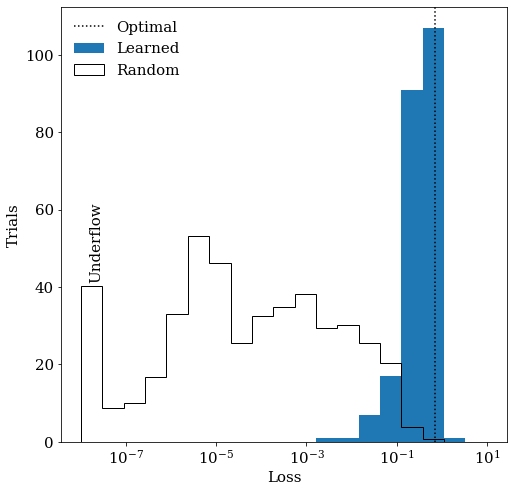

In [18]:
plt.rc('font', size=15)
plt.rcParams["font.family"] = "serif"
fig, ax = plt.subplots(figsize=(8, 8))
c = -8
randlosses2 = randlosses.copy()
randlosses2[randlosses2 < 10**c] = 10**c
b,_,_=plt.hist(symmlosses,label="Learned",bins=np.logspace(c,1,20), density=False)
a,_,_=plt.hist(randlosses2,label="Random",bins=np.logspace(c,1,20),histtype="step",color="black", weights=[2*len(symmlosses)/len(randlosses)]*len(randlosses))
plt.axvline(np.log(2),ls=":",color="black",label="Optimal")
plt.legend(frameon=False)
plt.xlabel("Loss")
plt.ylabel("Trials")
plt.text(1.5e-8,42,"Underflow",rotation=90)
plt.xscale("log")
plt.savefig("LHCOLosses.pdf", bbox_inches='tight')